## TRABAJO FINAL METODOLOGÍA DE LA OPINIÓN PÚBLICA

### "Análisis de resultados en las elecciones generales 2023 para CABA"


#### Grupo: Matías Chiampan, Nicolas Faccini, Camila Valeff

El objetivo del siguiente trabajo consistió en examinar los resultados electorales en la instancia de elecciones generales dentro de CABA. 
Para ello se utilizó Python y diferentes librerias importadas con el fin de robustecer la capacidad de análisis, incorporando diversidad de gráficas. 

Las librerías se importaron a partir de las funciones "import" e "install", los scripts para este paso fueron los siguientes:

## Importación de librerías

In [43]:
pip install contextily

In [44]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import plotly.express as px

Luego de importar las librerias requerida, importamos los archivos .csv que son nuestra fuente de información. Tenemos dos tipos de archivos: los referidos a los resultados de las elecciones en 2023 y las bases de datos del CENSO 2010 en Argentina. Estas últimas nos permitirán contar con variables sociodemográficos para las comunas de CABA, con el fin de explorar si existe algún patrón entre éstas y las elecciones de los votantes

## Bases de datos elecciones generales 2023

In [46]:
df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')
df_caba = pd.read_csv('2023_Generales\CABA-circuitos-electorales.csv')
df_ambitos = pd.read_csv('2023_Generales/Ambitos_Generales_2023.csv')
df_colores = pd.read_csv('2023_Generales/Colores_2023.csv')

C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\2164525572.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resultados = pd.read_csv('2023_Generales\ResultadosElectorales_2023.csv')


#### Las tablas importadas cuentan con la siguiente estructura

In [47]:
print("Tabla resultados")
print(f"Estructura: {df_resultados.shape}")
print("\n")
df_resultados.head().T

Tabla resultados
Estructura: (5868102, 23)




,0,1,2,3,4
año,2023,2023,2023,2023,2023
eleccion_tipo,GENERAL,GENERAL,GENERAL,GENERAL,GENERAL
recuento_tipo,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO,PROVISORIO
padron_tipo,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
distrito_id,1,1,1,1,1
distrito_nombre,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires
seccionprovincial_id,0,0,0,0,0
seccionprovincial_nombre,NaN,NaN,NaN,NaN,NaN
seccion_id,1,1,1,1,1
seccion_nombre,Comuna 01,Comuna 01,Comuna 01,Comuna 01,Comuna 01


In [48]:
print("Circuitos electorales en CABA")
print(f"Estructura: {df_caba.shape}")
print("\n")
df_caba.head()

Circuitos electorales en CABA
Estructura: (167, 10)




,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06


In [49]:
print("Ambitos Generales")
print(f'Estructura: {df_ambitos.shape}')
print("\n")
df_ambitos.head(15)

Ambitos Generales
Estructura: (528, 7)




,año,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre
0,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01
1,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,2,Comuna 02
2,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,3,Comuna 03
3,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,4,Comuna 04
4,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05
5,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,6,Comuna 06
6,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,7,Comuna 07
7,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,8,Comuna 08
8,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,9,Comuna 09
9,2023,1,Ciudad Autónoma de Buenos Aires,0,NaN,10,Comuna 10


### Mapa de comunas

Creamos un mapa de las comunas de CABA para visualizar como se distirbuyen en el mismo los datos geoespaciales brindados en la tabla de Circuitos Electorales.

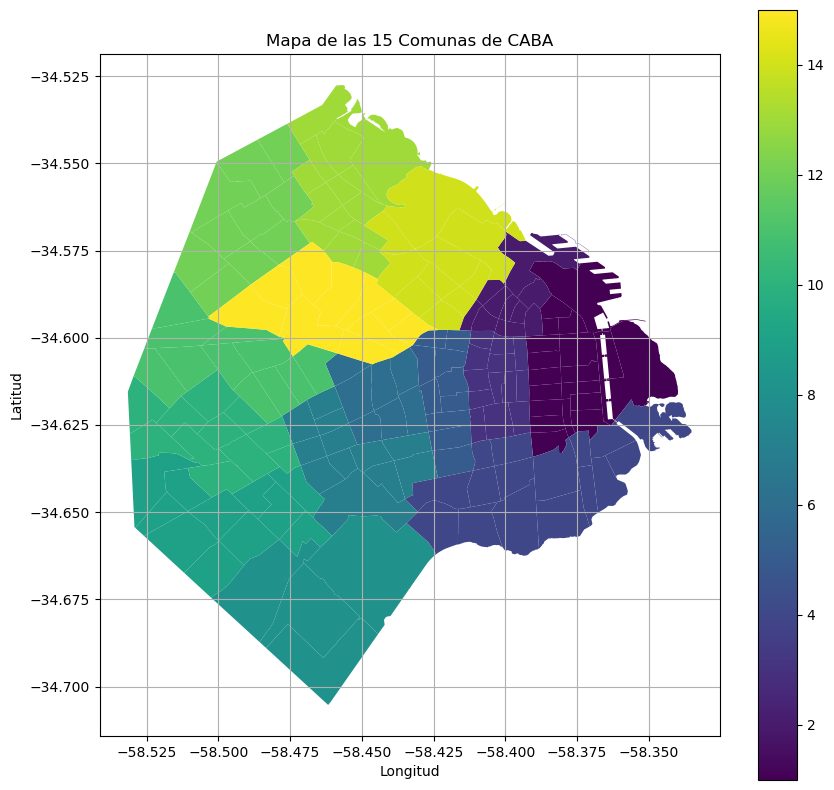

In [87]:
# Convertir la columna 'WKT' en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))

# Establecer el sistema de referencia de coordenadas (CRS)
# Suponiendo que tus datos están en coordenadas geográficas WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Dibujar el mapa
fig, ax = plt.subplots(figsize=(10, 10))  # Puedes ajustar el tamaño según tus necesidades
gdf.plot(column='COMUNA', ax=ax, cmap='viridis', legend=True)

# Configuración adicional para el mapa
plt.title('Mapa de las 15 Comunas de CABA')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

# Mostrar el mapa
plt.show()

## Bases de datos CENSO 2010

Las bases de datos del censo utilizadas son 8, siendo la base de viviendas, la de hogares y la de personas las 3 más importantes para el análisis del perfil sociodemográfico de las comunas en CABA. Las otras tablas se utilizarán para datos geográficos de la población, los cuales nos permiten relacionar la información del censo con las elecciones generales.

In [50]:
Cen_viviendas = pd.read_csv('censo2010/censo/vivienda.csv')
Cen_hogares = pd.read_csv('censo2010/censo/hogar.csv')
Cen_personas = pd.read_csv('censo2010/censo/persona.csv')
Cen_dpto = pd.read_csv('censo2010/censo/dpto.csv')
Cen_frac = pd.read_csv('censo2010/censo/frac.csv')
Cen_prov = pd.read_csv('censo2010/censo/prov.csv')
Cen_radio= pd.read_csv('censo2010/censo/radio.csv')

Para trabajar con las bases del censo 2010 se requirió generar un diagrama de entidad relación (DER) que permitiera un mayor entendimiento de sus datos. Cabe aclarar que éstos son centralmente códigos cuyas etiquetas se encuentran en la carpeta "lebels".
El DER se desarrolló de la siguiente forma:

<img src="DER_Censo2010.png">

#### Las tablas del CENSO 2010

Las tablas del censo 2010 se imprimen de la siguiente forma:

In [51]:
print("Tabla de características de las viviendas")
print(f'Estructura: {Cen_viviendas.shape}')
Cen_viviendas.head()

Tabla de características de las viviendas
Estructura: (1085463, 13)


,VIVIENDA_REF_ID,RADIO_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG
0,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2
1,2,1,1,7,1,0,1,1,2,20010001,2001010,2,2
2,3,1,1,4,1,0,1,1,1,20010001,2001010,1,2
3,4,1,1,4,1,0,1,1,1,20010001,2001010,1,1
4,5,1,1,1,1,0,1,3,3,20010001,2001010,2,1


In [52]:
print("Tabla características de los hogares")
print(f'Estructura: {Cen_hogares.shape}')
Cen_hogares.head()

Tabla características de los hogares
Estructura: (1152599, 23)


,HOGAR_REF_ID,VIVIENDA_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,...,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,1,1,4,1,1,1,1,1,...,2,2,1,2,1,2,5,1,1,0
1,2,1,2,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,0
2,3,1,4,1,3,1,1,1,1,1,...,3,5,1,1,1,1,1,1,2,0
3,4,1,6,1,1,1,1,1,1,1,...,3,5,1,1,1,1,5,6,8,1
4,5,2,1,1,1,2,1,1,1,1,...,5,5,1,1,2,1,6,1,2,1


In [53]:
print("Tabla de características de las personas")
print(f'Estructura: {Cen_personas.shape}')
Cen_personas.head()

Tabla de características de las personas
Estructura: (2890151, 15)


,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1


#### Merge Base de datos CENSO 2010

In [54]:
#merge para unificar personas-hogares

merge_persona_hogar = pd.merge(Cen_personas, Cen_hogares[['HOGAR_REF_ID', 'ALGUNBI', 'VIVIENDA_REF_ID']], on='HOGAR_REF_ID', how='left')

#merge para unificar el combinado anterior con viviendas

merge_total = pd.merge(merge_persona_hogar, Cen_viviendas[['VIVIENDA_REF_ID', 'MUNI', 'LOCAL']], on='VIVIENDA_REF_ID', how='left')

#total base censo por persona, filtrado por las comunas que pertenecen a CABA.
censo_caba = merge_total[(merge_total['MUNI'] >= 20010001) & (merge_total['MUNI'] <= 20150001)]

censo_caba

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT,ALGUNBI,VIVIENDA_REF_ID,MUNI,LOCAL
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1,0,1,20010001,2001010
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1,0,1,20010001,2001010
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1,0,1,20010001,2001010
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3,0,1,20010001,2001010
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1,1,1,20010001,2001010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0,2,1426438,20150001,2015010
2890147,2890148,1152599,0,2,91,1,0,1,0,3,19,2,6,1,0,2,1426438,20150001,2015010
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0,2,1426438,20150001,2015010
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0,2,1426438,20150001,2015010


In [55]:
#hacemos un replace para que los valores de id local coincidan con los ids de comuna en la base de elecciones (representan lo mismo)
nuevos_codigos = {2001010:1,
2002010:2,
2003010:3,
2004010:4,
2005010:5,
2006010:6,
2007010:7,
2008010:8,
2009010:9,
2010010:10,
2011010:11,
2012010:12,
2013010:13,
2014010:14,
2015010:15
}

censo_caba['LOCAL'] = censo_caba['LOCAL'].replace(nuevos_codigos)
censo_caba

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT,ALGUNBI,VIVIENDA_REF_ID,MUNI,LOCAL
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1,0,1,20010001,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1,0,1,20010001,1
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1,0,1,20010001,1
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3,0,1,20010001,1
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1,1,1,20010001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0,2,1426438,20150001,15
2890147,2890148,1152599,0,2,91,1,0,1,0,3,19,2,6,1,0,2,1426438,20150001,15
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0,2,1426438,20150001,15
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0,2,1426438,20150001,15


### Reestructuración de las tablas para caracterización de comunas

Con el fin de adaptar los resultados del censo a las necesidades de este trabajo, creamos nuevas tablas que nos permitirán luego conectar esta información con las bases de datos de los resultados electorales. Siguiente este propósito, nos hicimos las siguientes preguntas que orientarán más tarde el análisis:

    1. ¿Cuáles son las comunas con mayor cantidad de hogares/personas con alguna necesidad básica insatisfecha (NBI)?
    2. Según nivel educativo, ¿Cómo se distribuye el % de personas con un nivel educativo mayor a secundario completo? (cods 6,7,8 var P09 Población) ¿Y con al menos secundario completo?
    

Primero, se calculó cuantas personas tienen al menos alguna necesidad básica insatisfecha según los criterios del CENSO 2010


In [56]:
#Filtramos la base del censo de caba por la cantidad de personas que tienen alguna necesidad básica insatisfecha(cod 1)
#Luego, generamos una nueva tabla donde agrupamos por comuna y contabilizamos la cantidad de personas que cumplen con esa condición.
#La tabla se ordenó de acuerdo a las comunas que tenían mayor cantidad de personas con algún NBI. Reseteamos el índice para que LOCAL sea nuestra primera columna y creamos la columna conteo_ALGUNBI

CANT_personas_nbiP = censo_caba[censo_caba['ALGUNBI'] == 1].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_ALGUNBI')
pd.DataFrame(CANT_personas_nbiP)

#Calculamos el % del total de personas con alguna NBI en caba que representa cada comuna. 
CANT_personas_nbiP['P_de_poblacion_total_con_algun_NBI'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['conteo_ALGUNBI'].sum()) * 100).round(1).astype(str) + '%'

#De la base del censo, calculamos cuantas personas existen por comuna en la base, contabilizando la columna PERSONA_REF_ID. creamos una nueva tabla que agrupara por COMUNA estos datos.
poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Poblacion_de_comuna')

#Mergeamos nuestra primera tabla donde teniamos los datos de las necesidades básicas insatisfechas con la tabla de población por comuna.
CANT_personas_nbiP = pd.merge(CANT_personas_nbiP, poblacion_por_comuna, on='LOCAL')

#Una vez hecho esto, calculamos el % que representaba la cantidad de personas con NBI para la comuna y generamos una nueva columna
CANT_personas_nbiP['P_segun_poblacion_de_comuna'] = ((CANT_personas_nbiP['conteo_ALGUNBI'] / CANT_personas_nbiP['Poblacion_de_comuna']) * 100).round(1)
Total_NBI_caba = CANT_personas_nbiP['conteo_ALGUNBI'].sum()

print(f'Total de personas con al menos una necesidad básica insatisfecha en CABA: {Total_NBI_caba}')
pd.DataFrame(CANT_personas_nbiP)

Total de personas con al menos una necesidad básica insatisfecha en CABA: 198114


,LOCAL,conteo_ALGUNBI,P_de_poblacion_total_con_algun_NBI,Poblacion_de_comuna,P_segun_poblacion_de_comuna
0,1,34311,17.3%,205886,16.7
1,4,32157,16.2%,218245,14.7
2,8,25844,13.0%,187237,13.8
3,3,22897,11.6%,187537,12.2
4,7,21350,10.8%,220591,9.7
5,5,11079,5.6%,179005,6.2
6,15,9185,4.6%,182574,5.0
7,9,8504,4.3%,161797,5.3
8,10,6248,3.2%,166022,3.8
9,14,5873,3.0%,225970,2.6


Luego creamos un mapa para visualizar cuales son las comunas que tienen mayor porcentaje de personas con al menos una necesidad básica insatisfecha en sus hogares.


C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\3497068158.py:15: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')


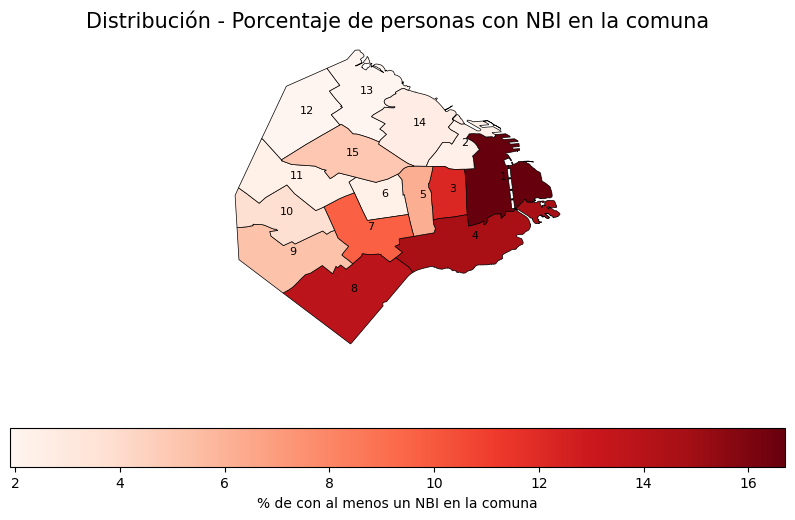

In [57]:
# Crear GeoDataFrame con los datos de de la base df_caba, donde contamos con las coordenadas de cada distrito.
gdf = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))

#forzamos que comuna sea un valor de tipo int para generar luego un join, lo mismo hicimos con la tabla que queríamos vincular "CANT personas nbiP"
gdf['COMUNA'] = gdf['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)

#Hicimos un left join entre gdf (con los datos de las comunas de caba) y "CANT personas nbiP", con los datos de necesidades básicas insatisfechas
gdf = gdf.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna P_segun_poblacion_de_comuna a valores numéricos, redondeamos los datos y los convertimos a float
gdf['P_segun_poblacion_de_comuna'] = gdf['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf_dissolved = gdf.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                'orientation': "horizontal"}, cmap='Reds', 
                   vmin=gdf['P_segun_poblacion_de_comuna'].min(), vmax=gdf['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con NBI en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

Realizamos un análisis de la población con un nivel educativo de al menos el secundario completo en 2010, por comuna. Para ello, tomamos los códigos 5,6,7,8 de la variable P09 de la tabla de población

In [58]:
CANT_personas_ES = censo_caba[censo_caba['P09'].isin([5,6,7,8])].groupby('LOCAL')['PERSONA_REF_ID'].count().sort_values(ascending=False).reset_index(name='conteo_personas_secundario')
pd.DataFrame(CANT_personas_ES)

CANT_personas_ES['Porcentaje que representa de la población total'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['conteo_personas_secundario'].sum()) * 100).round(1).astype(str) + '%'

poblacion_por_comuna = censo_caba.groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna')
poblacion_por_comuna_m18 = censo_caba[censo_caba['P03'] >= 18].groupby('LOCAL')['PERSONA_REF_ID'].count().reset_index(name='Población de comuna_m18')

merged_df = pd.merge(CANT_personas_ES, poblacion_por_comuna, on='LOCAL')

# Segundo merge entre merged_df y poblacion_por_comuna_m18
CANT_personas_ES = pd.merge(merged_df, poblacion_por_comuna_m18, on='LOCAL')

CANT_personas_ES['P_segun_poblacion_de_comuna'] = ((CANT_personas_ES['conteo_personas_secundario'] / CANT_personas_ES['Población de comuna_m18']) * 100).round(1)


CANT_personas_ES.sort_values(by='P_segun_poblacion_de_comuna', ascending=False)

,LOCAL,conteo_personas_secundario,Porcentaje que representa de la población total,Población de comuna,Población de comuna_m18,P_segun_poblacion_de_comuna
2,2,96279,8.7%,157932,136894,70.3
0,14,129717,11.7%,225970,191596,67.7
1,13,124974,11.3%,231331,192437,64.9
3,6,84628,7.6%,176076,146155,57.9
6,5,74894,6.8%,179005,147885,50.6
4,12,81909,7.4%,200116,162454,50.4
8,15,70232,6.3%,182574,148077,47.4
5,1,79402,7.2%,205886,168197,47.2
7,11,70351,6.3%,189832,153268,45.9
9,3,68846,6.2%,187537,153918,44.7


Luego, realizamos el mismo gráfico que aplicamos en el análisis de los casos con al menos un NBI, pero para el porcentaje de personas con el secundario o más del secundario completo


C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\3271123336.py:11: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')


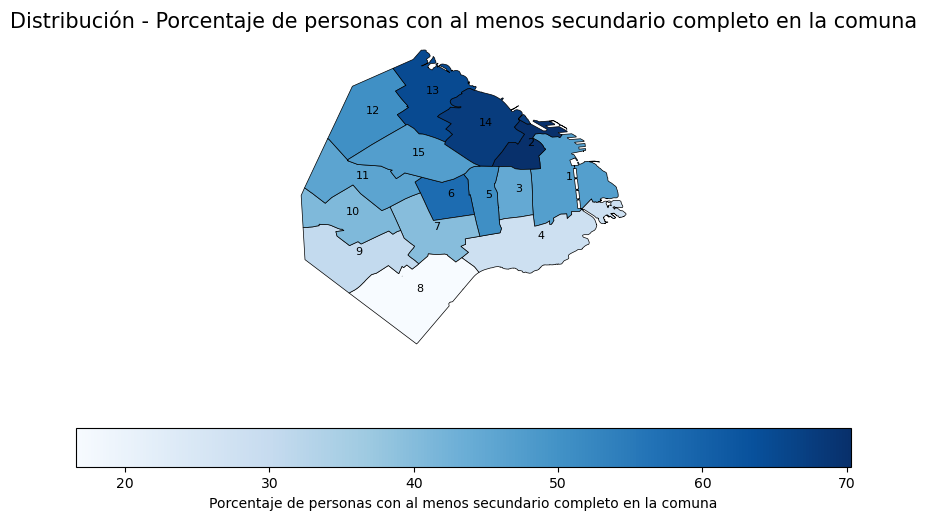

In [59]:
# Crear GeoDataFrame con geometría y datos de censo
gdf2 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf2['COMUNA'] = gdf2['COMUNA'].astype(int)
CANT_personas_ES['LOCAL'] = CANT_personas_ES['LOCAL'].astype(int)
gdf2 = gdf2.join(CANT_personas_ES.set_index('LOCAL'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf2['P_segun_poblacion_de_comuna'] = gdf2['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf2_dissolved = gdf2.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf2_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "Porcentaje de personas con al menos secundario completo en la comuna",
                                'orientation': "horizontal"}, cmap='Blues', 
                   vmin=gdf2['P_segun_poblacion_de_comuna'].min(), vmax=gdf2['P_segun_poblacion_de_comuna'].max(),
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf2_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf2_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('Distribución - Porcentaje de personas con al menos secundario completo en la comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

## Análisis de los resultados en CABA

Para producir un análisis de los resultaods electorales en CABA iniciamos reduciendo la base de datos inicial para que coincida con el recorte geográfico requerido. 

In [60]:
print("Tabla de resultados elecciones generales 2023- CABA")
df_resultados_caba = df_resultados[df_resultados['distrito_id'] == 1]
cant_votos_total_caba = df_resultados_caba['votos_cantidad'].sum()
print(f'Estructura: {df_resultados_caba.shape}')
print(f'Cantidad de votos totales: {cant_votos_total_caba}')
df_resultados_caba.head()

Tabla de resultados elecciones generales 2023- CABA
Estructura: (515822, 23)
Cantidad de votos totales: 13646850


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


### Revisión de las tablas

Analizamos los valores de la base importada para comprender la distribución de los valores en ella, con el siguiente código.

In [61]:
for columna in df_resultados_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_resultados_caba[columna].unique())
    print("\n") 

Opciones únicas en la columna año:
[2023]


Opciones únicas en la columna eleccion_tipo:
['GENERAL']


Opciones únicas en la columna recuento_tipo:
['PROVISORIO']


Opciones únicas en la columna padron_tipo:


['NORMAL']


Opciones únicas en la columna distrito_id:
[1]


Opciones únicas en la columna distrito_nombre:
['Ciudad Autónoma de Buenos Aires']


Opciones únicas en la columna seccionprovincial_id:
[0]


Opciones únicas en la columna seccionprovincial_nombre:
[nan]


Opciones únicas en la columna seccion_id:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Opciones únicas en la columna seccion_nombre:
['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


Opciones únicas en la columna circuito_id:
['00018' '00019' '00001' '00002' '00003' '00004' '00005' '00006' '00007'
 '00008' '00009' '00010' '00020' '00021' '00022' '00023' '00024' '00011'
 '00012' '00013' '00014' '00015' '00016' '00017' '00031' '00032' '00033'
 '00034' '00035' '00025' '00026' '00027' '00028' '00029' '00030' '00036'
 '00037' '00038' '00039' '00040' '00041' '00042' '00043' '00044' '00045'


Luego, implementamos el mismo análisis para el resto de las tablas sobre elecciones en 2023.

In [ ]:
print("Tabla circuitos electorales en CABA")
for columna in df_caba.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_caba[columna].unique())
    print("\n") 

In [ ]:
print("Tabla colores para mapas")
for columna in df_colores.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_colores[columna].unique())
    print("\n")  

In [ ]:
print("Tabla ambitos generales")
for columna in df_ambitos.columns:
    print(f"Opciones únicas en la columna {columna}:")
    print(df_ambitos[columna].unique())
    print("\n") 

### Vinculación entre tablas - Bases elecciones


Comenzamos haciendo un merge entre dos tablas requeridas para el análisis de los resultados electorales: la primera, la base de elecciones filtrada para Ciudad de Buenos Aires (df_resultados_caba), la segunda, la base sobre los circuitos electorales y sus características en este mismo distrito (df_caba). Ambas se relacionan a partir de la columna "seccion_id" (df_resultados_caba) y la columna "comuna" (df_caba) cuyos valores son los ids asignados a las comunas de la ciudad.

In [ ]:
df_resultados_caba['seccion_id'] = df_resultados_caba['seccion_id'].astype(int) #forzamos el formato int para que el id se reconozca como número entero
df_caba['COMUNA'] = df_caba['COMUNA'].astype(int) #forzamos el formato int para que el id se reconozca como número entero


In [66]:
#Generamos un merge que tenga como tabla principal la base de resultados de caba y agregue las columnas de la base de circuitos electorales de acuerdo a las valores coincidentes con la primera.
df_combinado = pd.merge(df_resultados_caba, df_caba, left_on='seccion_id', right_on='COMUNA', how='left')

print('\n')
print("Tabla Combinada")
print(f'Estructura: {df_combinado.shape}')
df_combinado.head()





Tabla Combinada
Estructura: (5850404, 33)


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06


In [67]:
df_resultados_x_comuna = pd.merge(df_caba, df_resultados_caba.groupby('circuito_id')['votos_cantidad'].sum().reset_index(), how='left', left_on= "COMUNA", right_on='circuito_id')
df_resultados_x_comuna

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,circuito_id,votos_cantidad
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,1,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05,1,7645
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,2,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05,1,7645
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,3,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06,1,7645
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,4,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05,1,7645
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,5,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06,1,7645
...,...,...,...,...,...,...,...,...,...,...,...,...
162,MULTIPOLYGON (((-58.4133289404238 -34.64349004...,57,57,4,NUEVA POMPEYA,18768.0,9532.0,9236.0,6341.986116,1.681075e+06,4,1838
163,MULTIPOLYGON (((-58.4752520574717 -34.66896222...,89,89,8,VILLA LUGANO,46140.0,23699.0,22441.0,10058.062239,4.524566e+06,8,5991
164,MULTIPOLYGON (((-58.464421436223 -34.660057142...,90,90,8,VILLA LUGANO,42538.0,21474.0,21064.0,10870.018985,4.771794e+06,8,5991
165,MULTIPOLYGON (((-58.4713146924268 -34.63664464...,112,112,10,FLORESTA,8290.0,3945.0,4345.0,3067.804478,5.421711e+05,10,8356


In [132]:
df_resultadosCaba = df_resultados[(df_resultados['distrito_id'] == 1) & 
                                  (df_resultados['cargo_nombre'] == "PRESIDENTE Y VICE")]

# Seleccionar solo las columnas requeridas
df_resultadosCaba = df_resultadosCaba[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]

# Restablecer el índice para que comience en 0
df_resultadosCaba.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(df_resultadosCaba.head(2))

   seccion_id circuito_id  mesa_id agrupacion_nombre  votos_cantidad
0           1       00018      474               NaN               0
1           1       00018      474               NaN               0


C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\4194615498.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):


<Figure size 1000x1000 with 0 Axes>

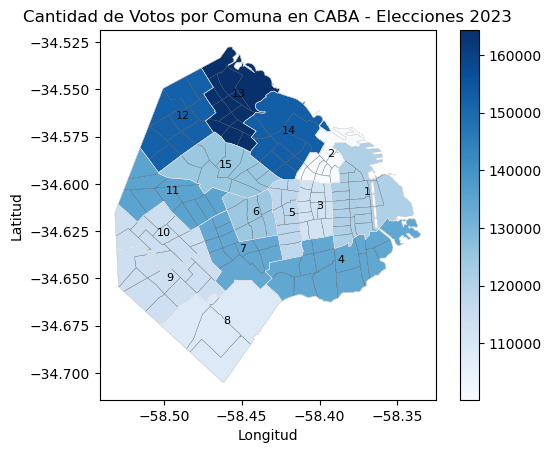

In [133]:
df_resultadosCaba['seccion_id'] = df_resultadosCaba['seccion_id'].astype(df_caba['COMUNA'].dtype)

# Agrupar los datos por 'seccion_id' y sumar los votos
df_votos_por_comuna = df_resultadosCaba.groupby('seccion_id')['votos_cantidad'].sum().reset_index()

# Realizar el merge
gdf_merged = gdf.merge(
    df_votos_por_comuna.groupby('seccion_id')['votos_cantidad'].max().reset_index(),
    left_on='COMUNA', right_on='seccion_id', how='left'
)

# Disolver por comuna
gdf_dissolved = gdf_merged.dissolve(by='COMUNA', aggfunc='max')

# Visualización
plt.figure(figsize=(10, 10))
ax = gdf_merged.plot(column='votos_cantidad', legend=True, cmap='Blues', edgecolor='0.3', linewidth=0.2)  # Ajuste del ancho de la línea

# Agregar líneas blancas
gdf_dissolved.boundary.plot(ax=ax, color='white', linewidth=0.3)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf_dissolved.geometry.centroid.x, gdf_dissolved.geometry.centroid.y, gdf_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')

plt.title('Cantidad de Votos por Comuna en CABA - Elecciones 2023')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()




In [151]:
df_resultados_comuna = df_resultadosCaba.groupby(['seccion_id'], as_index=False)['votos_cantidad'].sum()
df_resultados_comuna

,seccion_id,votos_cantidad
0,1,121250
1,2,100235
2,3,112465
3,4,134521
4,5,117662
5,6,124701
6,7,133889
7,8,109192
8,9,114065
9,10,114417


Ganadores por comuna en las elecciones generales de 2023 - Por partido

In [70]:
# Encontrar el índice del máximo en la columna 'votos_cantidad' dentro de cada grupo
idx_max_votos = df_resultados_agrupado.groupby('seccion_id')['votos_cantidad'].idxmax()

# Obtener el DataFrame de los ganadores
df_ganadores_seccion = df_resultados_agrupado.loc[idx_max_votos]

# Mostrar las primeras filas del DataFrame de los ganadores
print(df_ganadores_seccion.head(15))

    seccion_id     agrupacion_nombre  votos_cantidad
2            1  JUNTOS POR EL CAMBIO           45975
7            2  JUNTOS POR EL CAMBIO           57022
12           3  JUNTOS POR EL CAMBIO           39075
19           4   UNION POR LA PATRIA           51401
22           5  JUNTOS POR EL CAMBIO           43259
27           6  JUNTOS POR EL CAMBIO           54873
32           7  JUNTOS POR EL CAMBIO           48420
39           8   UNION POR LA PATRIA           43136
44           9   UNION POR LA PATRIA           39233
47          10  JUNTOS POR EL CAMBIO           41986
52          11  JUNTOS POR EL CAMBIO           54758
57          12  JUNTOS POR EL CAMBIO           64831
62          13  JUNTOS POR EL CAMBIO           87321
67          14  JUNTOS POR EL CAMBIO           80939
74          15   UNION POR LA PATRIA           46077


#### Mapa de ganadores por comuna

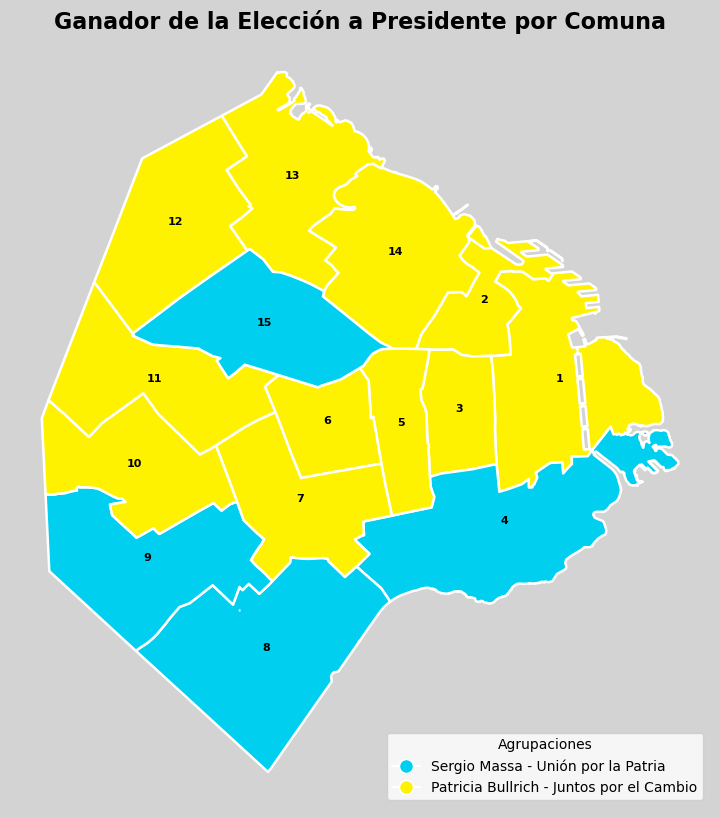

In [102]:
# Título del mapa
titulo = "Ganador de la Elección a Presidente por Comuna"

# Disolver los límites de los circuitos electorales para consolidar las comunas
gdf_dissolved = gdf.dissolve(by='COMUNA')

# Realizar el merge con el DataFrame geográfico disuelto
gdf_merged = gdf_dissolved.merge(df_votos_maximos, left_on='COMUNA', right_on='seccion_id', how='left')

# Crear un mapa de colores personalizado para las agrupaciones
colores = {'JUNTOS POR EL CAMBIO': '#FFF200', 'UNION POR LA PATRIA': '#00CFEF'}
gdf_merged['color'] = gdf_merged['agrupacion_nombre'].map(colores)

# Visualización con fondo gris claro y líneas blancas más anchas
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='lightgrey')

# Plotear usando los colores personalizados y añadir bordes más anchos y blancos
gdf_merged.plot(ax=ax, color=gdf_merged['color'], edgecolor='white', linewidth=1.8)

# Etiquetar cada comuna con su número
for idx, row in gdf_merged.iterrows():
    plt.annotate(text=row['seccion_id'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, weight='bold', color='black')

# Agregar título al mapa
plt.title(titulo, fontsize=16, weight='bold')

# Crear leyenda
leyenda = {
    'Sergio Massa - Unión por la Patria': '#00CFEF',
    'Patricia Bullrich - Juntos por el Cambio': '#FFF200'
}

handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
           for label, color in leyenda.items()]

plt.legend(handles=handles, title='Agrupaciones', loc='lower right')

# Quitar los ejes y el recuadro
plt.axis('off')

# Mostrar el mapa
plt.show()


### Análisis conjunto de necesidades básicas insatisfechas en 2010 y ganadores elecciones generales 2023

#### Mapa combinado

C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\2702691557.py:14: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')


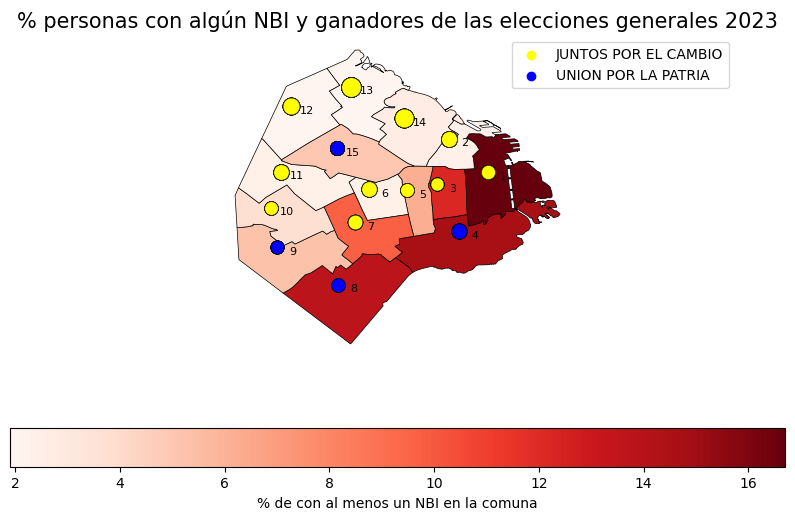

In [71]:
import seaborn as sns

# Crear GeoDataFrame con geometría y datos de censo
gdf3 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf3['COMUNA'] = gdf3['COMUNA'].astype(int)
CANT_personas_nbiP['LOCAL'] = CANT_personas_nbiP['LOCAL'].astype(int)
gdf3 = gdf3.join(CANT_personas_nbiP.set_index('LOCAL'), on='COMUNA', how='left')
gdf3 = gdf3.join(df_ganadores_seccion.set_index('seccion_id'), on='COMUNA', how='left')

# Convertir la columna a valores numéricos, redondear y convertir a float
gdf3['P_segun_poblacion_de_comuna'] = gdf3['P_segun_poblacion_de_comuna'].round(1).astype(float)

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf3_dissolved = gdf3.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf3_dissolved.plot(column='P_segun_poblacion_de_comuna', ax=ax, legend=True,
                    legend_kwds={'label': "% de con al menos un NBI en la comuna",
                                 'orientation': "horizontal"}, cmap='Reds', 
                    vmin=gdf3['P_segun_poblacion_de_comuna'].min(), vmax=gdf3['P_segun_poblacion_de_comuna'].max(),
                    edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf3_dissolved.geometry.centroid.x, gdf2_dissolved.geometry.centroid.y, gdf3_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')

# Agregar puntos para los ganadores de cada comuna
for idx, row in gdf3.iterrows():
    color = 'yellow' if row['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO' else 'blue'
    size = row['votos_cantidad'] / gdf3.groupby('agrupacion_nombre')['votos_cantidad'].transform('max').max() * 200
    centroid = gdf3_dissolved.geometry.centroid.loc[gdf3_dissolved.index == row['COMUNA']].squeeze()
    ax.scatter(centroid.x + (-0.007), centroid.y + 0.005, color=color, s=size, alpha=0.7, edgecolors='black', linewidth=0.5)
    
# Usar seaborn para mostrar leyenda
legend_labels = {'JUNTOS POR EL CAMBIO': 'yellow', 'UNION POR LA PATRIA': 'blue'}
for label, color in legend_labels.items():
    ax.scatter([], [], color=color, label=label)

# Añadir título y etiquetas
ax.set_title('% personas con algún NBI y ganadores de las elecciones generales 2023', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Ajustar posición de la leyenda
ax.legend(loc='upper left', bbox_to_anchor=(0.8, 1))
plt.show()


Para realizar una correlacion entre las variables analizadas, generamos una tabla nueva que cuenta con los datos de cantidad de votos por agrupación política, cantidad de personas con alguna NBI y cantidad de personas con estudios secundarios o superiores.

In [72]:
df_resultados_caba_pivot = df_resultados_agrupado.pivot_table(index='seccion_id',columns='agrupacion_nombre',values='votos_cantidad')

In [73]:
df_total = df_resultados_caba_pivot.join(CANT_personas_nbiP.set_index('LOCAL')['conteo_ALGUNBI'], on='seccion_id', how='left')
df_total = df_total.join(CANT_personas_ES.set_index('LOCAL')['conteo_personas_secundario'], on='seccion_id', how='left')
df_total = df_total.reset_index()
df_total

,seccion_id,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA,conteo_ALGUNBI,conteo_personas_secundario
0,1,3981,3230,45975,25657,38645,34311,79402
1,2,1912,2250,57022,17875,19225,3693,96279
2,3,4571,3362,39075,23562,38993,22897,68846
3,4,5586,4211,39963,29077,51401,32157,45852
4,5,4814,3675,43259,20595,42504,11079,74894
5,6,4208,3698,54873,20043,39230,4219,84628
6,7,4863,4193,48420,28137,44622,21350,68032
7,8,4285,3238,26068,27845,43136,25844,21764
8,9,4578,4047,37413,25544,39233,8504,38421
9,10,4719,4164,41986,23062,37457,6248,54148


#### Correlación Juntos por el Cambio y variables sociodemográficas

In [74]:
print("Correlación Juntos por el Cambio y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_ALGUNBI'], method='kendall'))

print("\n")
print("Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['JUNTOS POR EL CAMBIO'].corr(df_total['conteo_personas_secundario'], method='kendall'))

Correlación Juntos por el Cambio y cantidad de personas con alguna NBI


Correlación Pearson:  -0.555537111489104
Correlación spearman:  -0.7035714285714285
Correlación kendall:  -0.48571428571428577


Correlación Juntos por el Cambio y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  0.9268965464296802
Correlación spearman:  0.907142857142857
Correlación kendall:  0.7714285714285715


#### Correlación La Libertad Avanza y variables sociodemográficas

In [75]:
print("Correlación La Libertad Avanza y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))

print("\n")
print("Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['LA LIBERTAD AVANZA'].corr(df_total['conteo_personas_secundario'], method='kendall'))

Correlación La Libertad Avanza y cantidad de personas con alguna NBI


Correlación Pearson:  0.4330818983446092
Correlación spearman:  0.3714285714285714
Correlación kendall:  0.23809523809523814


Correlación La Libertad Avanza y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  -0.18221367522887047
Correlación spearman:  -0.2821428571428571
Correlación kendall:  -0.21904761904761905


#### Correlación Unión por la Patria y variables sociodemográficas

In [76]:
print("Correlación Unión por la Patria y cantidad de personas con alguna NBI")
print("\n")

print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_ALGUNBI'], method='kendall'))

print("\n")
print("Correlación Unión por la Patria y cantidad de personas con al menos estudios secundarios")
print("\n")

print('Correlación Pearson: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='pearson'))
print('Correlación spearman: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='spearman'))
print('Correlación kendall: ', df_total['UNION POR LA PATRIA'].corr(df_total['conteo_personas_secundario'], method='kendall'))

Correlación Unión por la Patria y cantidad de personas con alguna NBI


Correlación Pearson:  0.4014210227457864
Correlación spearman:  0.3714285714285714
Correlación kendall:  0.2761904761904762


Correlación Unión por la Patria y cantidad de personas con al menos estudios secundarios


Correlación Pearson:  -0.4400047109878674
Correlación spearman:  -0.5142857142857142
Correlación kendall:  -0.37142857142857144


### Relación con la participación electoral

In [77]:
df_caba.head(4)
df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales')
df_caba2 = pd.DataFrame(df_caba.groupby('COMUNA')['TOTAL'].sum().reset_index(name='Votantes totales'))

In [109]:
df_resultadosCaba3 = df_resultados[(df_resultados['distrito_id'] == 1)]
df_resultadosCaba3 = df_resultadosCaba3[['seccion_id', 'circuito_id', 
                                       'mesa_id', 'agrupacion_nombre', 
                                       'votos_cantidad']]
df_resultadosCaba3.reset_index(drop=True, inplace=True)


df_resultadosCaba3.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos')
df_resultadosCaba2 =pd.DataFrame(df_resultadosCaba.groupby('seccion_id')['votos_cantidad'].sum().reset_index(name='Votos emitidos'))
df_resultadosCaba2 = pd.merge(df_caba2.set_index('COMUNA'), df_resultadosCaba2.set_index('seccion_id'), how='left', left_index=True, right_index=True)
df_resultadosCaba2.reset_index(inplace=True)
df_resultadosCaba2['Participacion_por_comuna'] = (df_resultadosCaba2['Votos emitidos'] / df_resultadosCaba2['Votantes totales'] *100).round(1).astype('float')

participacion_total_caba = (df_resultadosCaba2['Votos emitidos'].sum() / df_resultadosCaba2['Votantes totales'].sum() *100).round(1).astype('float')
print(f'Participación total en CABA: {participacion_total_caba}')
votantes_totales_caba = df_resultadosCaba2['Votantes totales'].sum()
votos_emitidos_caba = df_resultadosCaba2['Votos emitidos'].sum()
print(f'Cantidad de votantes en CABA: {votantes_totales_caba}')
print(f'Cantidad de votos emitidos en CABA: {votos_emitidos_caba}')
df_resultadosCaba2.sort_values('Participacion_por_comuna', ascending=False)



Participación total en CABA: 76.5
Cantidad de votantes en CABA: 2497035.0
Cantidad de votos emitidos en CABA: 1911431


,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna
11,12,170614.0,152072,89.1
5,6,151400.0,124701,82.4
7,8,133107.0,109192,82.0
10,11,166065.0,135206,81.4
6,7,169326.0,133889,79.1
9,10,144652.0,114417,79.1
8,9,145237.0,114065,78.5
12,13,210142.0,164311,78.2
4,5,152252.0,117662,77.3
14,15,161865.0,124840,77.1


C:\Users\camiv\AppData\Local\Temp\ipykernel_3612\3091518701.py:5: FutureWarning: The default value of numeric_only in aggfunc='mean' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')


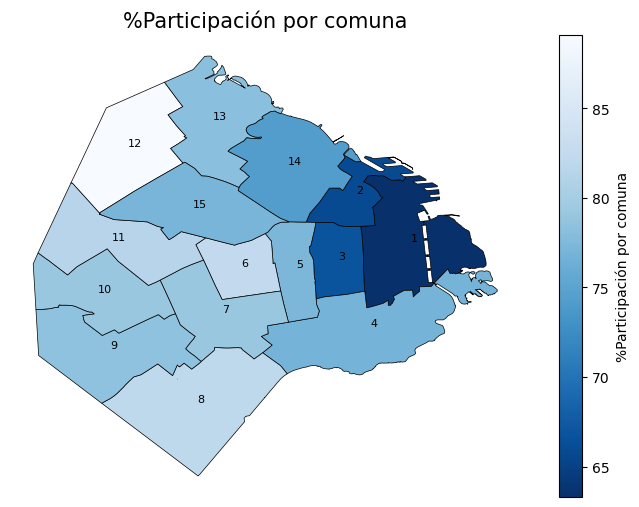

In [79]:
gdf5 = gpd.GeoDataFrame(df_caba, geometry=gpd.GeoSeries.from_wkt(df_caba['WKT']))
gdf5 = gdf5.join(df_resultadosCaba2.set_index('COMUNA'), on='COMUNA', how='left')

# Dissolver por COMUNA y calcular el promedio de "% según población de comuna"
gdf5_dissolved = gdf5.dissolve(by='COMUNA', aggfunc='mean')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Cambiar colores y agregar etiquetas
gdf5_dissolved.plot(column='Participacion_por_comuna', ax=ax, legend=True,
                   legend_kwds={'label': "%Participación por comuna",
                                'orientation': "vertical"}, cmap='Blues_r', 
                   edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las comunas
for x, y, label in zip(gdf5_dissolved.geometry.centroid.x, gdf5_dissolved.geometry.centroid.y, gdf5_dissolved.index):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center', va='center', color='black')


# Añadir título y etiquetas
ax.set_title('%Participación por comuna', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.show()

#### Correlacion participación y votos


In [80]:
df_total2 = pd.merge(df_total, df_resultadosCaba2, left_on='seccion_id', right_on='COMUNA', how='left')
df_total2

,seccion_id,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA,conteo_ALGUNBI,conteo_personas_secundario,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna
0,1,3981,3230,45975,25657,38645,34311,79402,1,191557.0,121250,63.3
1,2,1912,2250,57022,17875,19225,3693,96279,2,152142.0,100235,65.9
2,3,4571,3362,39075,23562,38993,22897,68846,3,168193.0,112465,66.9
3,4,5586,4211,39963,29077,51401,32157,45852,4,174922.0,134521,76.9
4,5,4814,3675,43259,20595,42504,11079,74894,5,152252.0,117662,77.3
5,6,4208,3698,54873,20043,39230,4219,84628,6,151400.0,124701,82.4
6,7,4863,4193,48420,28137,44622,21350,68032,7,169326.0,133889,79.1
7,8,4285,3238,26068,27845,43136,25844,21764,8,133107.0,109192,82.0
8,9,4578,4047,37413,25544,39233,8504,38421,9,145237.0,114065,78.5
9,10,4719,4164,41986,23062,37457,6248,54148,10,144652.0,114417,79.1


In [85]:
df_total2['P_de_votos_UP'] = (df_total2['UNION POR LA PATRIA']/df_total2['Votos emitidos']*100).round(2)
df_total2['P_de_votos_JXC'] = (df_total2['JUNTOS POR EL CAMBIO']/df_total2['Votos emitidos']*100).round(2)
df_total2['P_de_votos_LLA'] = (df_total2['LA LIBERTAD AVANZA']/df_total2['Votos emitidos']*100).round(2)

df_total2.sort_values()


,seccion_id,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA,conteo_ALGUNBI,conteo_personas_secundario,COMUNA,Votantes totales,Votos emitidos,Participacion_por_comuna,P_de_votos_UP,P_de_votos_JXC,P_de_votos_LLA
0,1,3981,3230,45975,25657,38645,34311,79402,1,191557.0,121250,63.3,31.87,37.92,21.16
1,2,1912,2250,57022,17875,19225,3693,96279,2,152142.0,100235,65.9,19.18,56.89,17.83
2,3,4571,3362,39075,23562,38993,22897,68846,3,168193.0,112465,66.9,34.67,34.74,20.95
3,4,5586,4211,39963,29077,51401,32157,45852,4,174922.0,134521,76.9,38.21,29.71,21.62
4,5,4814,3675,43259,20595,42504,11079,74894,5,152252.0,117662,77.3,36.12,36.77,17.50
5,6,4208,3698,54873,20043,39230,4219,84628,6,151400.0,124701,82.4,31.46,44.00,16.07
6,7,4863,4193,48420,28137,44622,21350,68032,7,169326.0,133889,79.1,33.33,36.16,21.02
7,8,4285,3238,26068,27845,43136,25844,21764,8,133107.0,109192,82.0,39.50,23.87,25.50
8,9,4578,4047,37413,25544,39233,8504,38421,9,145237.0,114065,78.5,34.40,32.80,22.39
9,10,4719,4164,41986,23062,37457,6248,54148,10,144652.0,114417,79.1,32.74,36.70,20.16


#### Correlación partido y cantidad de votos


In [81]:
def calcular_correlaciones(df_total2, columna_votos='Votos emitidos'):
    # Filtrar solo las columnas numéricas para calcular correlaciones
    columnas = ['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']
    
    # Iterar sobre las columnas y calcular la correlación con 'cantidad de votos'
    for columna in columnas:
        correlacion = df_total2[columna].corr(df_total2[columna_votos], method='pearson')
        print(f"La correlación entre {columna} y {columna_votos} es: {correlacion.round(2)}")

calcular_correlaciones(df_total2, )


La correlación entre FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD y Votos emitidos es: 0.27
La correlación entre HACEMOS POR NUESTRO PAIS y Votos emitidos es: 0.67
La correlación entre JUNTOS POR EL CAMBIO y Votos emitidos es: 0.79
La correlación entre LA LIBERTAD AVANZA y Votos emitidos es: 0.56
La correlación entre UNION POR LA PATRIA y Votos emitidos es: 0.33


In [82]:
calcular_correlaciones(df_total2, 'Participacion_por_comuna')

La correlación entre FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD y Participacion_por_comuna es: 0.57
La correlación entre HACEMOS POR NUESTRO PAIS y Participacion_por_comuna es: 0.75
La correlación entre JUNTOS POR EL CAMBIO y Participacion_por_comuna es: 0.07
La correlación entre LA LIBERTAD AVANZA y Participacion_por_comuna es: 0.32
La correlación entre UNION POR LA PATRIA y Participacion_por_comuna es: 0.53


#### Correlación %por partido y participacion%

In [86]:
def calcular_correlaciones(df_total2, columna_votos='Participacion_por_comuna'):
    # Filtrar solo las columnas numéricas para calcular correlaciones
    columnas = ['P_de_votos_UP', 'P_de_votos_JXC', 'P_de_votos_LLA']
    
    # Iterar sobre las columnas y calcular la correlación con 'cantidad de votos'
    for columna in columnas:
        correlacion = df_total2[columna].corr(df_total2[columna_votos], method='pearson')
        print(f"La correlación entre {columna} y {columna_votos} es: {correlacion.round(2)}")

calcular_correlaciones(df_total2, )


La correlación entre P_de_votos_UP y Participacion_por_comuna es: 0.26
La correlación entre P_de_votos_JXC y Participacion_por_comuna es: -0.21
La correlación entre P_de_votos_LLA y Participacion_por_comuna es: -0.06


### Correlación entre partidos

In [104]:
# Filtrar por 'cargo_nombre' igual a 'PRESIDENTE Y VICE'
df_presidente = df_combinado[df_combinado['cargo_nombre'] == 'PRESIDENTE Y VICE']

# Seleccionar las columnas requeridas
nuevo_df = df_presidente[['mesa_id', 'cargo_nombre', 'circuito_id','votos_cantidad', 'COMUNA', 'agrupacion_id', 'agrupacion_nombre']]

# Eliminar filas duplicadas
df_analisis = nuevo_df.drop_duplicates()

# Restablecer el índice y asignar el resultado de vuelta al DataFrame
df_analisis = df_analisis.reset_index(drop=True)

df_analisis.head()

,mesa_id,cargo_nombre,circuito_id,votos_cantidad,COMUNA,agrupacion_id,agrupacion_nombre
0,474,PRESIDENTE Y VICE,00018,0,1,0,NaN
1,475,PRESIDENTE Y VICE,00018,95,1,134,UNION POR LA PATRIA
2,475,PRESIDENTE Y VICE,00018,59,1,132,JUNTOS POR EL CAMBIO
3,475,PRESIDENTE Y VICE,00018,57,1,135,LA LIBERTAD AVANZA
4,475,PRESIDENTE Y VICE,00018,9,1,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD


In [105]:
import pandas as pd

# Filtrar el DataFrame
df_filtrado = df_analisis[df_analisis['agrupacion_nombre'].isin(['UNION POR LA PATRIA', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA'])]

# Crear un DataFrame agrupado por comuna y mesa
df_agrupado = df_filtrado.groupby(['COMUNA', 'mesa_id', 'agrupacion_nombre'])['votos_cantidad'].sum().unstack()

# Calcular la correlación (R2)
correlacion_r2 = df_agrupado.corr()

# Filtrar la correlación para las combinaciones deseadas
correlacion_r2_seleccionada = correlacion_r2.loc['UNION POR LA PATRIA', ['JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']]

# Imprimir resultados
print("Correlación (R2) entre UNION POR LA PATRIA y JUNTOS POR EL CAMBIO:")
print(correlacion_r2_seleccionada['JUNTOS POR EL CAMBIO'])

print("\nCorrelación (R2) entre UNION POR LA PATRIA y LA LIBERTAD AVANZA:")
print(correlacion_r2_seleccionada['LA LIBERTAD AVANZA'])

# Agregar correlación entre JUNTOS POR EL CAMBIO y LA LIBERTAD AVANZA
correlacion_jpc_libertad_avanza = correlacion_r2.loc['JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']
print("\nCorrelación (R2) entre JUNTOS POR EL CAMBIO y LA LIBERTAD AVANZA:")
print(correlacion_jpc_libertad_avanza)

Correlación (R2) entre UNION POR LA PATRIA y JUNTOS POR EL CAMBIO:
-0.49393605255519213

Correlación (R2) entre UNION POR LA PATRIA y LA LIBERTAD AVANZA:
0.371909808214261

Correlación (R2) entre JUNTOS POR EL CAMBIO y LA LIBERTAD AVANZA:
-0.22047343368550357


## Insights de los resultados

### Escenario electoral 2023 - CABA

Durante las elecciones generales de CABA en 2023 se registró una concurrencia del 76.5%, abarcando la totalidad del padrón a 2.497.035 personas.
Las comunas con mayor participación electoral fueron las Comunas 12, 6 y 8, y las de menor participación las Comunas 1,2 y 3

La distribución de los votos para las elecciones a presidente y vice presidente de distirbuyeron de la siguiente forma:

In [123]:
df_resultados_agrupado2.sort_values('votos_cantidad', ascending=False)

,agrupacion_nombre,votos_cantidad,porcentaje_votos
2,JUNTOS POR EL CAMBIO,767367,41.23
4,UNION POR LA PATRIA,600832,32.28
3,LA LIBERTAD AVANZA,369424,19.85
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,66145,3.55
1,HACEMOS POR NUESTRO PAIS,57607,3.09


Juntos por el Cambio fue el ganador en CABA con 41% de los votos, seguido de Unión por la Patria con 32% de los votos

Por comuna, los partidos ganadores fueron los siguientes